# Frequent Value Imputation (Categorical Data)

Before training any machine learning model, handling missing values is a critical step.  
For **categorical features**, one of the simplest and most commonly used techniques is **Frequent Value Imputation**.

## What is Frequent Value Imputation?
It replaces missing values with the **most frequently occurring category (mode)** in a feature.

## Why Use It?
- Easy to implement  
- Preserves dataset size  
- Works well when missing values are **few and random**

## Important Note
This method may introduce **bias** if a large number of values are missing, so it should be applied carefully.

In the next section, we will implement frequent value imputation step by step on categorical data.


In [1]:
# advanced regressing housing data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("train.csv" , usecols=["GarageQual" ,"FireplaceQu" ,"SalePrice"])

In [4]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [5]:
df.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

<Axes: xlabel='GarageQual'>

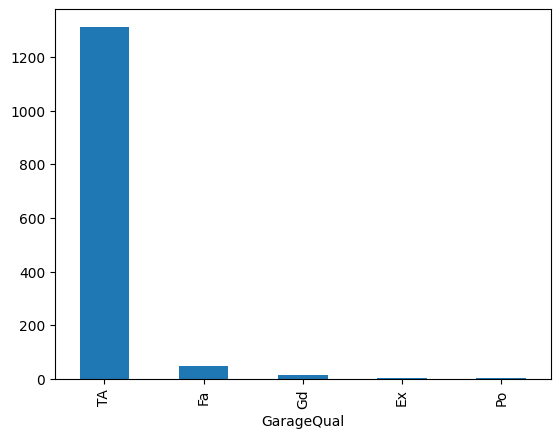

In [9]:
df["GarageQual"].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

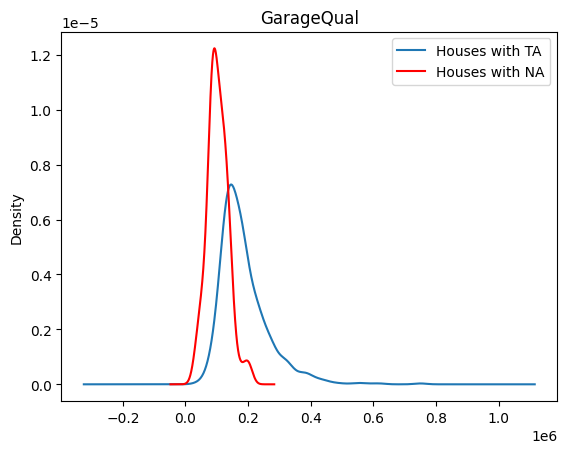

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Filters rows where garage quality is Typical/Average
# Plots the distribution of SalePrice
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax)

# Plot SalePrice for houses where GarageQual is missing
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')


In [15]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [16]:
# imputing missing value with TA
df['GarageQual'].fillna('TA', inplace=True) 

In [17]:
df.isnull().sum()

FireplaceQu    690
GarageQual       0
SalePrice        0
dtype: int64

Text(0.5, 1.0, 'GarageQual')

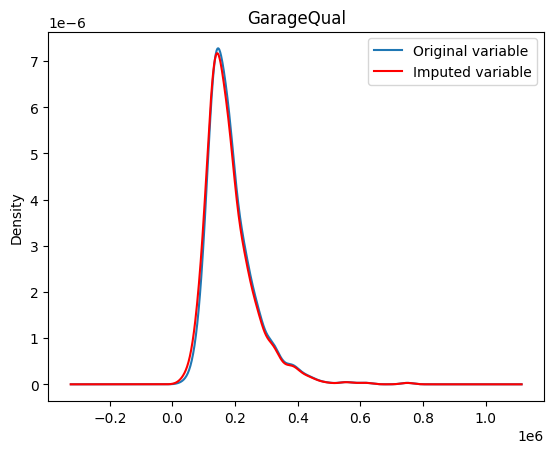

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

# previous one 
temp.plot(kind='kde' , ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# adding title
plt.title('GarageQual')

In [19]:
df.isnull().sum()

FireplaceQu    690
GarageQual       0
SalePrice        0
dtype: int64

<Axes: xlabel='FireplaceQu'>

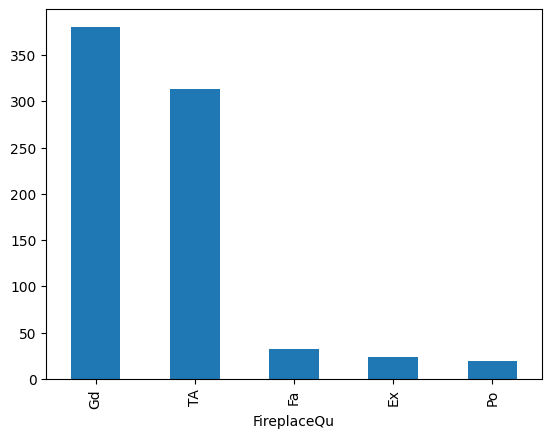

In [21]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu Good Quality vs missing value')

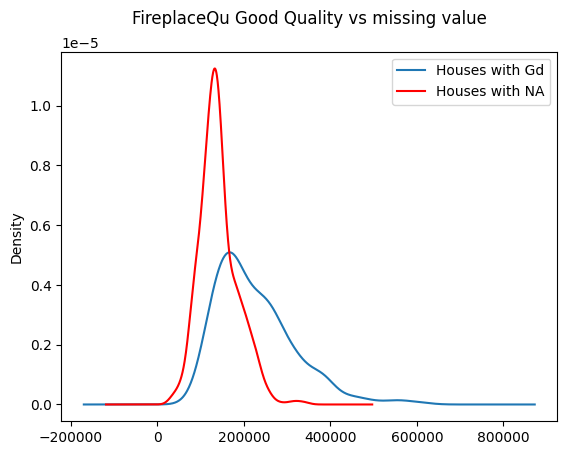

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')
 
plt.title('FireplaceQu Good Quality vs missing value',  pad=20)

In [26]:
temp2 = df[df['FireplaceQu']=='Gd']['SalePrice']

In [27]:
df['FireplaceQu'].fillna('Gd' , inplace=True)

<Axes: xlabel='FireplaceQu'>

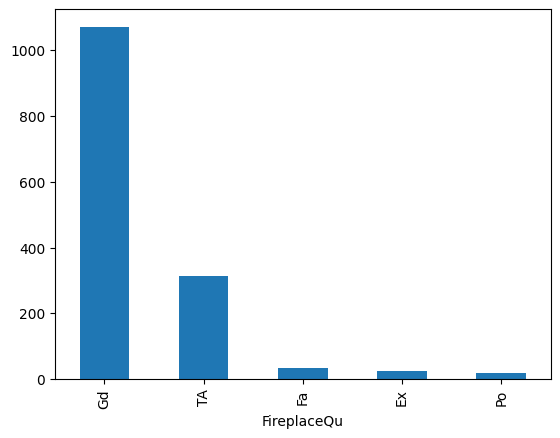

In [28]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

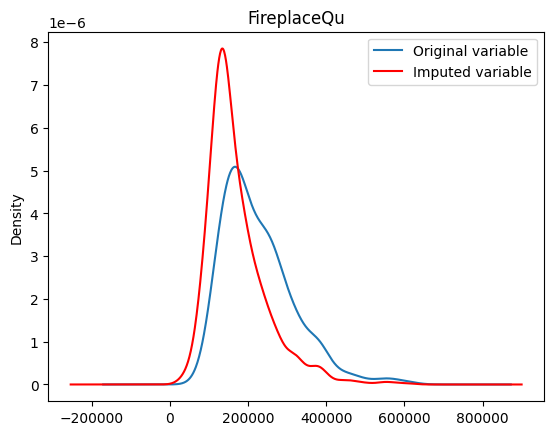

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp2.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [37]:
## here its not giving good result for this column so this imputation is not good to use for this category

## using sklearn

In [30]:
# train_test_split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2
)

In [31]:
from sklearn.impute import SimpleImputer

In [32]:
imputer = SimpleImputer(strategy='most_frequent')

In [35]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [36]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)